# <center> MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
---

### 2. K-Means

In [10]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

```Python
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
```
* `n_clusters` — количество кластеров;
* `n_init` — количество итераций алгоритма k-means;
* `random_state` — параметр для воспроизводимости результатов от запуска к запуску.

MINI-BATCH K-MEANS

```Python
# два кластера и подвыборки объёма 6

kmeans = MiniBatchKMeans(n_clusters=2,random_state=42,batch_size=6)
```

K-MEANS++

In [7]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [12]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

```Python
silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))
```

---

### 4. K-Means и EM-алгоритм: практика

* `gradyear` — год выпуска;
* `gender` — пол;
* `age` — возраст;
* `friends` — число друзей в социальной сети;
* `basketball`, `football`, `soccer`, `softball`, `volleyball`, `swimming`, `cheerleading`, `baseball`, `tennis`, `sports`, `cute`, `sex`, `sexy`, `hot`, `kissed`, `dance`, `band`, `marching`, `music`, `rock`, `god`, `church`, `jesus`, `bible`, `hair`, `dress`, `blonde`, `mall`, `shopping`, `clothes`, `hollister`, `abercrombie`, `die`, `death`, `drunk`, `drugs` (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [36]:
# Задание 4.1
# Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка
# Удалите все остальные признаки. Какова размерность вашего текущего набора данных?
import pandas as pd

data = (pd.read_csv('data/snsdata.csv')
        .drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
data.shape

(30000, 36)

In [37]:
# Задание 4.2
# Теперь нормализуйте данные с помощью StandardScaler()
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(data)

# Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0])
# Ответ округлите до двух знаков после точки-разделителя
round(X[0][0], 2)

-0.33

In [39]:
# Задание 4.3
# Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=9, random_state=42)
kmc.fit(X)

# Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя
round(kmc.inertia_, 2)

856276.7

In [51]:
# Задание 4.4
# Сколько подростков относится к наиболее многочисленному кластеру?
# А сколько — к самому малочисленному?
y = kmc.labels_
pd.Series(y).value_counts()

1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
Name: count, dtype: int64

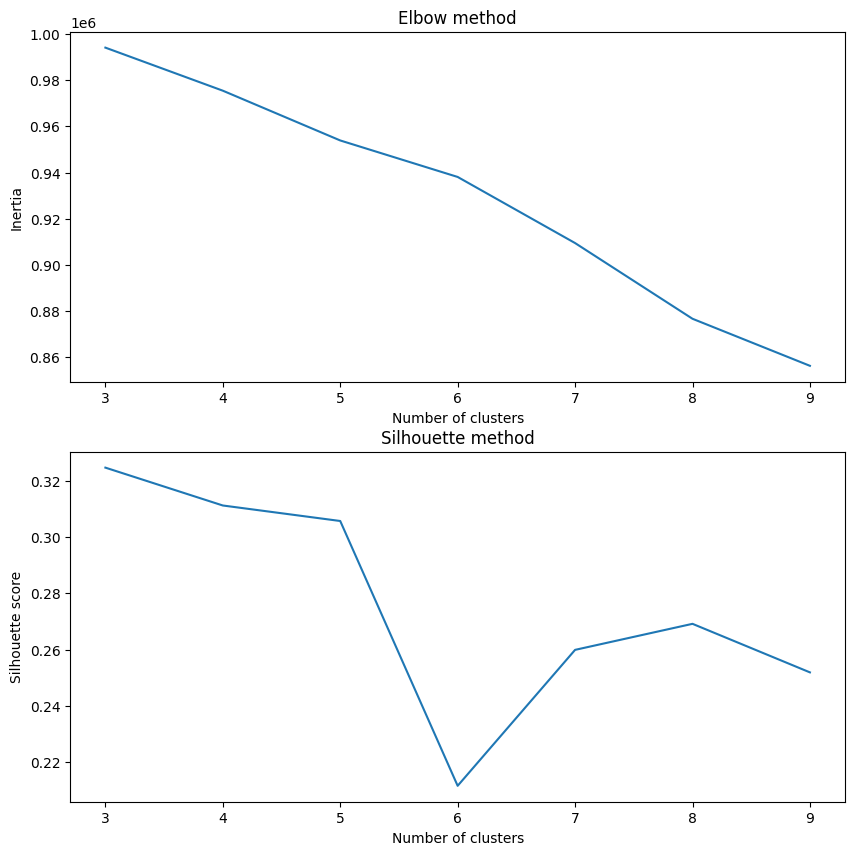

minimal inertia at 9 clusters


In [71]:
# Задание 4.5
# 1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров
# Будем выбирать количество кластеров из диапазона от 3 до 9
# Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? 
# Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []
silhouette = []
for n in range(3, 10):
    inertia.append(get_inertia(n, X))
    silhouette.append(get_silhouette(n, X))
    
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.lineplot(x=range(3, 10), y=inertia, ax=ax[0])
ax[0].set_title('Elbow method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')

# 2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?
# Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, 
# выберите наименьшее количество кластеров из подходящих
# Внимание: программа может выполняться несколько минут — будьте готовы подождать
sns.lineplot(x=range(3, 10), y=silhouette, ax=ax[1])
ax[1].set_title('Silhouette method')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette score')
plt.show()

print(f'minimal inertia at {list(range(3, 10))[inertia.index(min(inertia))]} clusters')

In [94]:
# Задание 4.6
# Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта
# Реализуйте сегментацию подростков на выбранном количестве кластеров
# Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми
# Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк
# Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них
kmc_opt = KMeans(n_clusters=3, random_state=42)
kmc_opt.fit(X)
data['KMeans_cluster'] = kmc_opt.labels_
top = []
for cluster, group in data.groupby('KMeans_cluster'):
    top_ten = group.mean().sort_values(ascending=False).head(10).index
    top.append(set(top_ten))
set.intersection(*top)

{'dance', 'god', 'hair', 'music'}

In [96]:
# Задание 4.7
# Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму
# Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42
# Сколько подростков алгоритм отнёс к самому многочисленному кластеру?
from sklearn.mixture import GaussianMixture
import numpy as np

emc = GaussianMixture(n_components=3, random_state=42)
emc.fit(X)
y = emc.predict(X)
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20670,  2874,  6456], dtype=int64))

In [110]:
np.where(kmc.labels_ == 6)

(array([14187], dtype=int64),)

In [114]:
# Задание 4.8
# В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется
# Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:
data.iloc[14187].sort_values(ascending=False).head(3)

blonde    327
sex        22
hair       12
Name: 14187, dtype: int64

---